In [4]:
from prophet import Prophet
import pandas as pd

In [5]:
df_data=pd.read_csv("https://raw.githubusercontent.com/jonasdieckmann/prophet_tutorial/main/passengers.csv")

In [19]:
df_data.head()

,ds,y
0,2012-01,112
1,2012-02,118
2,2012-03,132
3,2012-04,129
4,2012-05,121


In [13]:
df_data_train=df_data[df_data['ds'] < '2023-01']
df_data_test=df_data[df_data['ds'] >= '2023-01']

display(df_data_train)

,ds,y
0,2012-01,112
1,2012-02,118
2,2012-03,132
3,2012-04,129
4,2012-05,121
...,...,...
127,2022-08,559
128,2022-09,463
129,2022-10,407
130,2022-11,362


C:\Users\nimne\AppData\Local\Temp\ipykernel_25172\2051936073.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  decompose.plot().show()


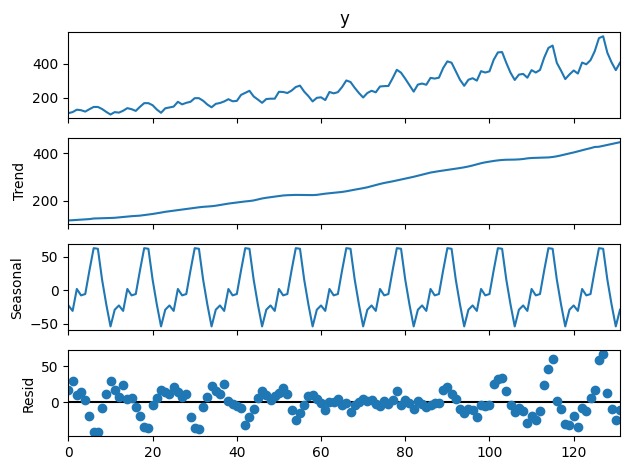

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df_data_train.y,model='additive',extrapolate_trend='freq',period=12)
decompose.plot().show()

In [22]:
df_train_prophet=df_data_train.rename(columns={'Month':'ds','Passengers':'y'})

In [23]:
model_prophet=Prophet()
model_prophet.fit(df_train_prophet)

11:48:38 - cmdstanpy - INFO - Chain [1] start processing
11:48:40 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
df_future=model_prophet.make_future_dataframe(periods=12,freq='MS')
display(df_future)

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
139,2023-08-01
140,2023-09-01
141,2023-10-01
142,2023-11-01


In [25]:
forecast_prophet=model_prophet.predict(df_future)
forecast_prophet[['ds','yhat','yhat_lower','yhat_upper']].round().tail(12)

,ds,yhat,yhat_lower,yhat_upper
132,2023-01-01,426.0,401.0,452.0
133,2023-02-01,423.0,398.0,448.0
134,2023-03-01,446.0,421.0,472.0
135,2023-04-01,441.0,417.0,466.0
136,2023-05-01,452.0,429.0,477.0
137,2023-06-01,495.0,469.0,520.0
138,2023-07-01,533.0,507.0,558.0
139,2023-08-01,532.0,509.0,557.0
140,2023-09-01,484.0,460.0,509.0
141,2023-10-01,446.0,421.0,472.0


C:\Users\nimne\AppData\Local\Temp\ipykernel_25172\3733000099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_test['Month']=pd.to_datetime(df_data_test['ds'])


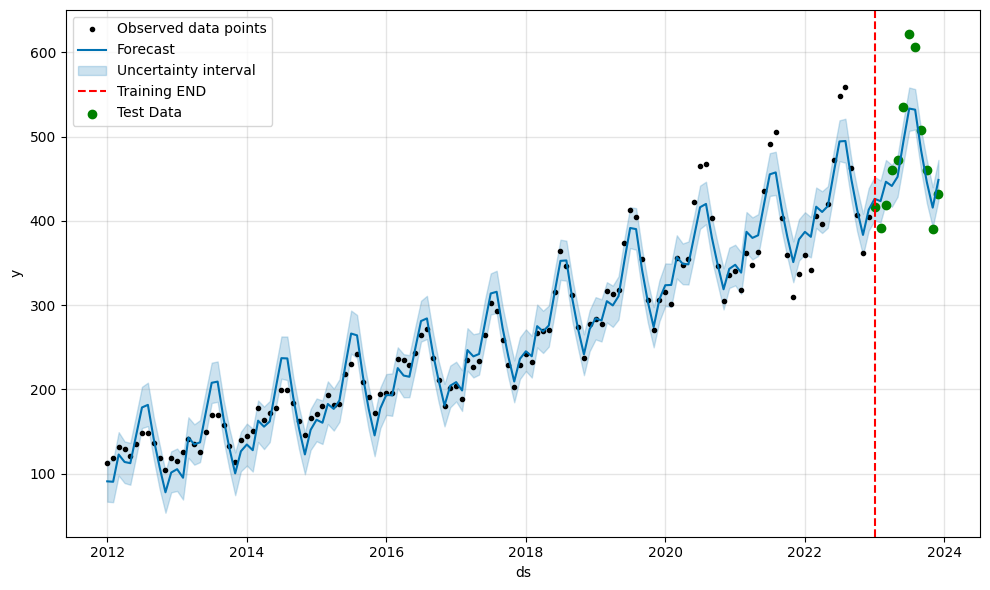

In [26]:
import matplotlib.pyplot as plt

forcast_plot=model_prophet.plot(forecast_prophet)
axes=forcast_plot.gca()
last_train_date=forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_train_date,linestyle='--',color='red',label="Training END")
df_data_test['Month']=pd.to_datetime(df_data_test['ds'])
df_data_test_points=plt.scatter(df_data_test['ds'],df_data_test['y'],color='green',label='Test Data')
plt.legend()
plt.show()